# 1. Install and Import Dependencies

In [2]:
#!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
!pip install torch==1.8.1+cpu torchvision==0.9.1+cpu torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cpu (from versions: 2.0.0, 2.0.0+cpu, 2.0.0+cu117, 2.0.0+cu118, 2.0.1, 2.0.1+cpu, 2.0.1+cu117, 2.0.1+cu118)
ERROR: No matching distribution found for torch==1.8.1+cpu

[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [4]:
!cd yolov5 & pip install -r requirements.txt

     -------------------------------------- 188.5/188.5 kB 1.9 MB/s eta 0:00:00
  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl (7.5 MB)
  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)
  Using cached PyYAML-6.0.1-cp311-cp311-win_amd64.whl (144 kB)
     ---------------------------------------- 44.0/44.0 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00
     -------------------------------------- 609.6/609.6 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 10.6/10.6 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 293.3/293.3 kB 2.6 MB/s eta 0:00:00
  Using cached setuptools-68.1.2-py3-none-any.whl (805 kB)
     ---------------------------------------- 62.7/62.7 kB 3.3 MB/s eta 0:00:00
  Using cached contourpy-1.1.0-cp311-cp311-win_amd64.whl (470 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 2.1/2.1 MB 2


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

C:\Users\bobjo\OneDrive\Desktop\YOLO-Drowsiness-Detection\yolo\Lib\site-packages\torch\hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\bobjo/.cache\torch\hub\master.zip
requirements: Ultralytics requirement ['setuptools>=65.5.1'] not found, attempting AutoUpdate...

requirements: AutoUpdate success  4.1s, installed 1 package: ['setuptools>=65.5.1']
requirements:  Re

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/yolov5s.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\bobjo/.cache\torch\hub\master.zip
YOLOv5  2023-8-21 Python-3.11.0 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [35]:
#img = 'https://ultralytics.com/images/bus.jpg'
img = r"C:\Users\bobjo\OneDrive\Desktop\YOLO-Drowsiness-Detection\yolov5\data\images\bus.jpg"
#img = 'https://upload.wikimedia.org/wikipedia/commons/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [36]:
results = model(img)
results.print()

image 1/1: 1080x810 4 persons, 1 bus
Speed: 25.0ms pre-process, 479.6ms inference, 3.0ms NMS per image at shape (1, 3, 640, 480)


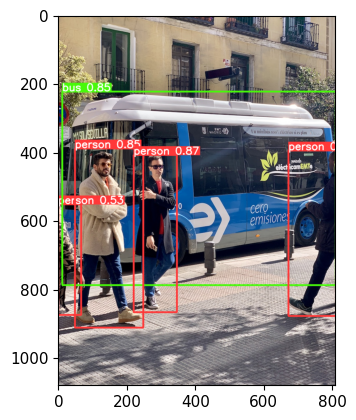

In [37]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [27]:
np.array(results.render()).shape

(1, 480, 640, 3)

# 4. Real Time Detections

In [17]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [5]:
import uuid   # Unique identifier
import os
import time

In [40]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [41]:
IMAGES_PATH

'data\\images'

In [42]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [43]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.b9adcd02-4017-11ee-9fef-005056c00008.jpg


In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [44]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [45]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached PyQt5-5.15.9-cp37-abi3-win_amd64.whl (6.8 MB)
  Using cached lxml-4.9.3-cp311-cp311-win_amd64.whl (3.8 MB)
  Using cached PyQt5_sip-12.12.2-cp311-cp311-win_amd64.whl (78 kB)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)


In [3]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

^C


# 6. Load Custom Model

In [18]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\bobjo/.cache\torch\hub\master.zip
YOLOv5  2023-8-21 Python-3.11.0 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [19]:
img = os.path.join('data', 'images', 'awake.45bde007-4017-11ee-befd-005056c00008.jpg')

In [20]:
results = model(img)

In [21]:
results.print()

image 1/1: 480x640 3 awakes
Speed: 18.0ms pre-process, 1333.5ms inference, 25.0ms NMS per image at shape (1, 3, 480, 640)


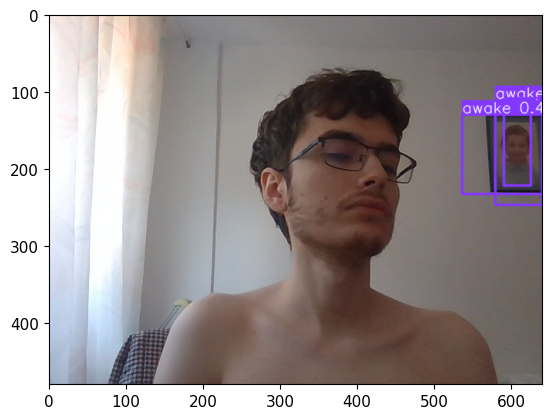

In [22]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()